In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#                          ****************   SF vs. epoch   ****************

In [3]:
inputdir = '/Users/orion/phd_research/CSS2/stellar_mod/0_sfr-mburst_calc/SFRvsEpoch_plots/continuous/'
inputdir2 = '/Users/orion/phd_research/CSS2/stellar_mod/0_sfr-mburst_calc/SFRvsEpoch_plots/instantaneous/'

In [4]:
def set_fig():
    
    fig, axes = plt.subplots(2, 3, figsize=(16,13)) 
    plt.subplots_adjust(wspace=0.6, hspace=0.3)
    plt.rcParams['font.family'] = 'sans-serif'
    #plt.rcParams['axes.linewidth'] = 1.0
    
    for ax in fig.get_axes():
        ax.yaxis.labelpad = 10
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.yaxis.set_ticks_position('both') 
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis='both',direction='in',which='both',length=3, pad=4.0, width=0.8, labelsize=12)
        ax.tick_params(which='minor',length=2)
        
        #ax.twinx().set_yscale('log')

    return(fig,axes)

In [5]:
def read_source_data():
    
    fig,ax = set_fig()

    for source in range(len(targets)):
    
        #global i,j
        i,j=0,0

        if source==1:
            j=1
        elif source==2:
            j=2
        elif source==3:
            i,j=1,0
        elif source==4:
            i,j=1,1
        elif source==5:
            i,j=1,2
        
        ax[i,j].set_title(targets[source], fontsize=24)

        #userows = [x for x in range(0,29)]
        df = pd.read_table(inputdir+targets[source]+'_SFRcont.csv', sep='\s+', 
                                                       header=0)#, skiprows=lambda x: x not in userows)
        df['epochs'] = df['epochs'].apply(lambda x: int(str(x)[:-3]))
        x = df['epochs']
        
        #displaying only models with nebular+stellar emission
        y1 = df['model_2c'] 
        y2 = df['model_4c'] 
        y3 = df['model_6c'] 
        
        df2 = pd.read_table(inputdir2+targets[source]+'_SFRinst.csv', sep='\s+', 
                                                    header=0)#, skiprows=lambda x: x not in userows)
        y4 = df2['model_1i'] 
        y5 = df2['model_3i'] 
        y6 = df2['model_5i'] 

        if i==0 and j==0:
            lgd = plot_sfr(fig,ax,i,j,x,y1,y2,y3,y4,y5,y6)
        else:
            plot_sfr(fig,ax,i,j,x,y1,y2,y3,y4,y5,y6)
        
    return lgd      #only to run bbox_extra_artists; need to pass it as a list 
    

In [9]:
def plot_sfr(fig,axes,i,j,x,y1,y2,y3,y4,y5,y6):
    
    global lgd, lgd2
    
    l,n = 1.5,2.5
    axes[i,j].set_xlabel('Age (Myr)', fontsize=14)
    axes[i,j].set_ylabel('SFR (M$_\odot$ yr$^{-1}$)', labelpad=4.0, fontsize=14)
    axes[i,j].set_xlim(-20,120)
    axes[i,j].plot(x, y1, color='mediumblue', linewidth=l, label='Model 1')
    axes[i,j].plot(x, y2, color='mediumseagreen', linewidth=l, label='Model 2')
    axes[i,j].plot(x, y3, color='crimson', linewidth=l, label='Model 3')
    
    
    axes2=axes[i,j].twinx()
    #axes2 = axes[0,0].twinx()
    #axes[i,j].twinx().set_ylim(10,15000)
    #axes[i,j].twinx().plot()
    axes2.set_ylabel('Starburst mass (x 10$^6$ M$_\odot$)', labelpad=12.0, fontsize=14)
    axes2.plot(x, y4, color='mediumblue', linewidth=l, label='Model 1', alpha=0.8, linestyle='--')
    axes2.plot(x, y5, color='mediumseagreen', linewidth=l, label='Model 2', alpha=0.8, linestyle='--')
    axes2.plot(x, y6, color='crimson', linewidth=l, label='Model 3', alpha=0.8, linestyle='--')
    
    axes[i,j].set_ylim(-10,150)
    axes2.set_ylim(0,800)
    
    if i==1 and j==2 :   #1221
        axes[i,j].set_ylim(-10,100)
        axes[i,j].set_xlim(1,500)
        axes2.set_ylim(0,1500)
        axes[i,j].axhline(3.63, color='k', lw=n, alpha=0.8)
        #axes[i,j].fill_betweenx(y1, 10, 30, color='green', alpha=0.5)
        axes[i,j].fill_between(x, -10, 200, where=(x>2) & (x<8),color='pink', alpha=0.5)
        
    if (i==0 and j==1):    #1037
        axes[i,j].set_ylim(-5,35)
        axes2.set_ylim(0,400)
        axes[i,j].axhline(1.41, color='k', lw=n, alpha=0.8)
        axes[i,j].fill_between(x, -10, 200, where=(x<5),color='pink', alpha=0.5) 
    
    if (i==0 and j==2):    #1128
        axes[i,j].set_ylim(-5,80)
        axes[i,j].axhline(0.97, color='k', lw=n, alpha=0.8)
        axes[i,j].fill_between(x, -10, 200, where=(x>4) & (x<11),color='pink', alpha=0.5)
    
    if (i==1 and j==0):   #1201
        axes[i,j].set_ylim(-5,35)
        axes2.set_ylim(0,400)
        axes[i,j].axhline(2.89, color='k', lw=n, alpha=0.8)
        axes[i,j].fill_between(x, -10, 200, where=(x>-0.5) & (x<2.5),color='pink', alpha=0.5)
    
    if (i==1 and j==1):   #1203
        #axes[i,j].set_ylim(-5,120)
        axes[i,j].set_ylim(-5,60)
        axes[i,j].axhline(1.0, color='k', lw=n, alpha=0.8)
        axes[i,j].fill_between(x, -10, 200, where=(x>5) & (x<12),color='pink', alpha=0.5)
    
    
    handles, labels = axes[i,j].get_legend_handles_labels()
    handles2, labels2 = axes2.get_legend_handles_labels()
    
    if i==0 and j==0:    #1025
        axes[i,j].axhline(5.32, color='k', lw=n, alpha=0.8)
        axes[i,j].fill_between(x, -10, 200, where=(x<5),color='pink', alpha=0.5)
        
        lgd = fig.legend(handles, labels, fontsize='large', title='Continuous SF', title_fontsize='x-large', 
                                borderaxespad=0., bbox_to_anchor=(1.07, 0.6), shadow=True, edgecolor='grey')
        lgd2 = fig.legend(handles2, labels2, fontsize='large', title='Instantaneous \nburst', 
            title_fontsize='x-large', borderaxespad=0., bbox_to_anchor=(1.07, 0.5), shadow=True, edgecolor='grey')
        
    return lgd, lgd2


/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/Users/orion/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8:

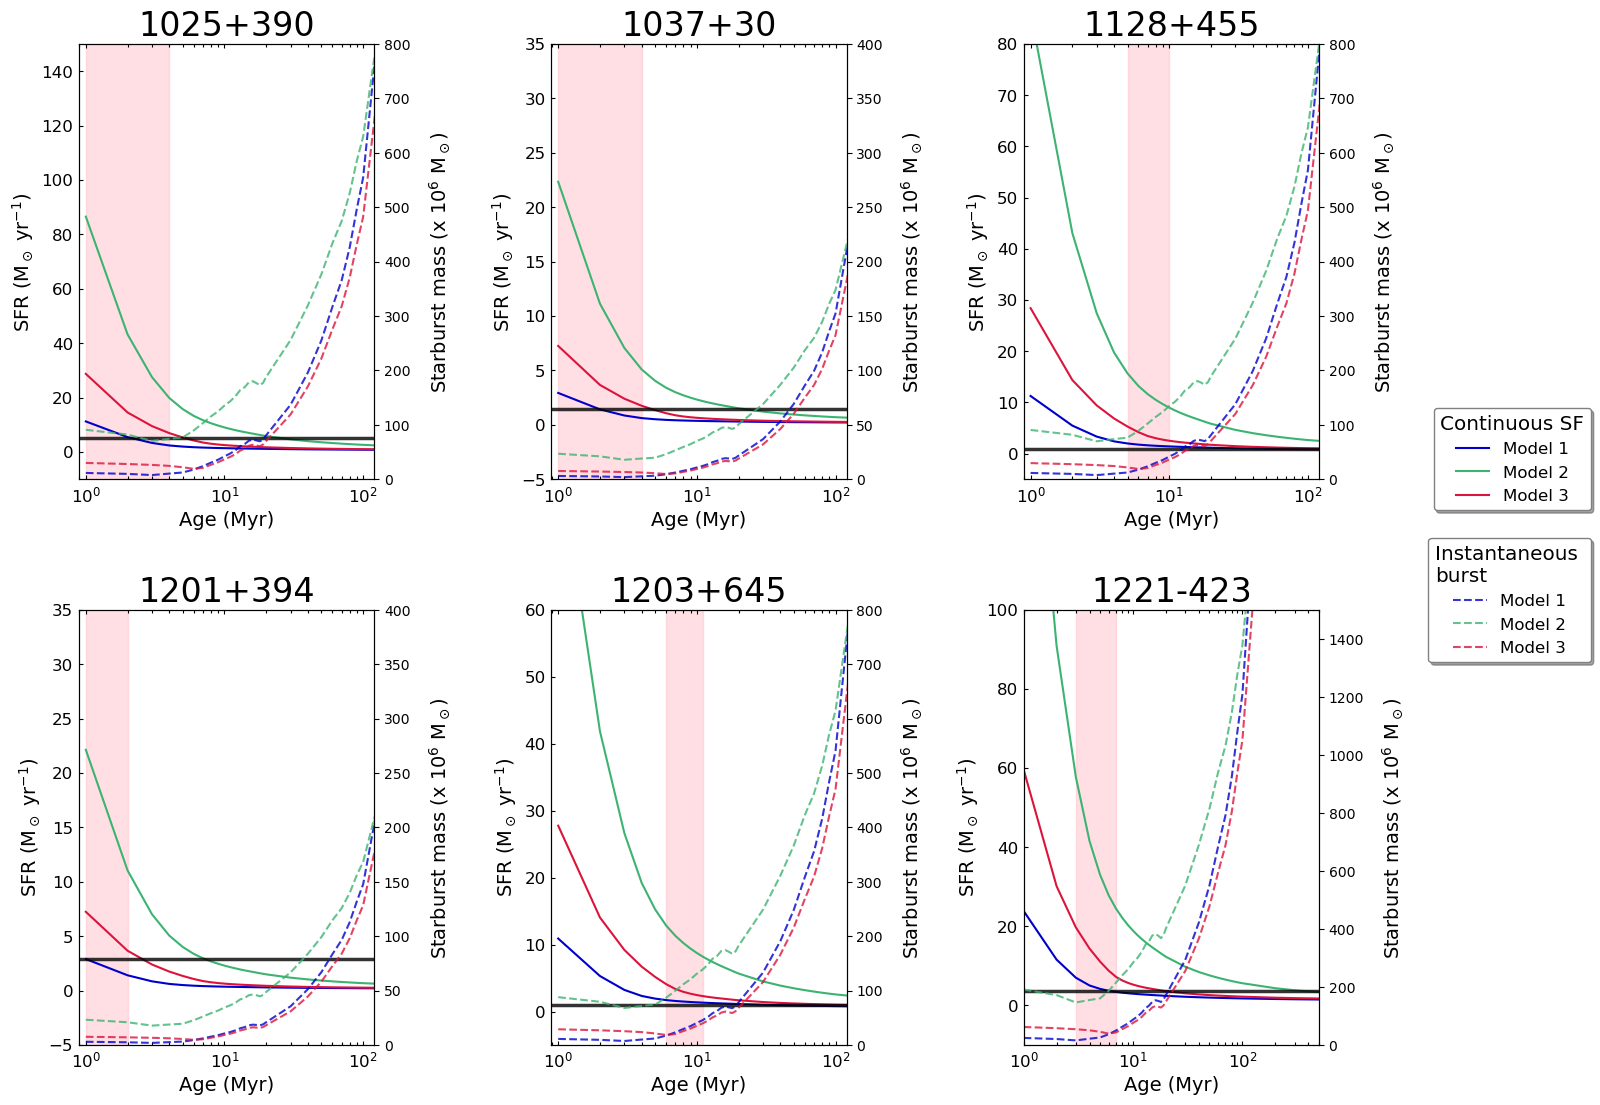

In [11]:
targets = ['1025+390', '1037+30', '1128+455', '1201+394', '1203+645', '1221-423'] 

i,j=0,0
lgds, lgds2=read_source_data()
plt.savefig('SFvsEpoch.pdf', facecolor='w', dpi=800, bbox_extra_artists=[lgds],bbox_inches='tight')
